Name: Saiful Islam Sohel &nbsp Email: saifulislamsohel30@gmail.com <br>
Name: Chinmoy Mondol &nbsp Email: chinmoymondol46@gmail.com <br>
Name: Hassan Shahriar Ayon &nbsp Email: hs.ayon2211@gmail.com <br>
<center><h1> Introduction</h1></center>
<p>This project aims to detect the classification of various flowers. The dataset was acquired from Kaggle. In this dataset, there are 5 classes of flowers (Daisy, Dandelion, Rose, Sunflower, and Tulip), and for each class, there are about 800 images. The recognition was done by selecting and training a sequential model using the aforementioned dataset.</p>


<h3> Importing libraries</h3>
<p> The required libraries were imported in the following snippet.</p>

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, Flatten
import pickle
import time
from tensorflow.keras.callbacks import TensorBoard
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import random

<h3> Directory and Categories.</h3>
<p> The following snippet defines the Directory and Categories.</p>

In [2]:
data_dir = 'C:/Users/saifu/Codes/Assignment/Final/flowers'
catagories = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

<h3> Loading the Dataset</h3>
<p> The dataset was acquired from ‘https://www.kaggle.com/alxmamaev/flowers-recognition’. The dataset was normalized and loaded here. It was also saved as a pickle file for future use.</p>

In [5]:
train_data = []

for cat in catagories:
    path = os.path.join(data_dir, cat)
    c_num = catagories.index(cat)
    for img in tqdm(os.listdir(path)):
        try:
            temp = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized_temp = cv2.resize(temp, (100, 100))
            train_data.append([resized_temp, c_num])
        except Exception as e:
            pass

100%|██████████| 984/984 [00:04<00:00, 221.82it/s]


In [ ]:
random.shuffle(train_data)

x = []
y = []
for photo, label in train_data:
    x.append(photo)
    y.append(label)

x = np.array(x).reshape(-1, 100, 100, 1)

p_out = open('image_data.pickle', 'wb') #save dataset as pickle
pickle.dump(x, p_out)
p_out.close()
p_out = open('label_data.pickle', 'wb')
pickle.dump(y, p_out)
p_out.close()

In [9]:
label = ['Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']

p_in = open('image_data.pickle', 'rb') #open saved dataset in pickle
x = pickle.load(p_in)
p_in = open('label_data.pickle', 'rb')
y = pickle.load(p_in)

x = np.array(x / 255)
y = np.array(y)

In [3]:
print(y.shape) #test label shape
print(x.shape[1:]) #test image shape

(4323,)
(100, 100, 1)


<h3> Making a Model </h3>
<p>In this code snippet, the models were initialized with the combination of 1, 2, and 3 convolutional layers, 0, 1, and 2 dense layers, and 32, 64, and 128 neurons. The models were trained to determine which model was best suited. </p>

In [4]:
dense_layers = [0, 1, 2]
layer_sizes = [32, 64, 128]
conv_layers = [1, 2, 3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()
            model.add(Conv2D(layer_size, (3, 3), input_shape = x.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            
            for i in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten())

            for i in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))
            model.add(Dense(5))
            model.add(Activation('softmax'))
            
            tensorboard = TensorBoard(log_dir = 'logss\{}'.format(NAME))
            
            model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
            model.fit(x, y, epochs=10, batch_size = 8, validation_split = 0.1, callbacks = [tensorboard])

s: 1.5794 - accuracy: 0.2676 - val_loss: 1.5312 - val_accuracy: 0.3095
Epoch 2/10
3890/3890 [==============================] - 5s 1ms/sample - loss: 1.4833 - accuracy: 0.3460 - val_loss: 1.4112 - val_accuracy: 0.3949
Epoch 3/10
3890/3890 [==============================] - 5s 1ms/sample - loss: 1.3227 - accuracy: 0.4483 - val_loss: 1.3711 - val_accuracy: 0.4411
Epoch 4/10
3890/3890 [==============================] - 5s 1ms/sample - loss: 1.1952 - accuracy: 0.5252 - val_loss: 1.2685 - val_accuracy: 0.4642
Epoch 5/10
3890/3890 [==============================] - 5s 1ms/sample - loss: 1.0499 - accuracy: 0.5931 - val_loss: 1.2993 - val_accuracy: 0.4457
Epoch 6/10
3890/3890 [==============================] - 5s 1ms/sample - loss: 0.8778 - accuracy: 0.6599 - val_loss: 1.2963 - val_accuracy: 0.5058
Epoch 7/10
3890/3890 [==============================] - 5s 1ms/sample - loss: 0.7005 - accuracy: 0.7393 - val_loss: 1.4613 - val_accuracy: 0.5058
Epoch 8/10
3890/3890 [==============================]

<h3> Training the Suited Model </h3>
<p>The model with the lowest validation curve in the TensorBoard was chosen. The model was then again trained using the dataset</p>

In [4]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape = x.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(5))
model1.add(Activation('softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(x, y, epochs=10, batch_size = 64, validation_split = 0.1)

Train on 3890 samples, validate on 433 samples
Epoch 1/10
3890/3890 [==============================] - 2s 423us/sample - loss: 1.6062 - accuracy: 0.3162 - val_loss: 1.4210 - val_accuracy: 0.4018
Epoch 2/10
3890/3890 [==============================] - 1s 313us/sample - loss: 1.3143 - accuracy: 0.4812 - val_loss: 1.3801 - val_accuracy: 0.4249
Epoch 3/10
3890/3890 [==============================] - 1s 311us/sample - loss: 1.1099 - accuracy: 0.5848 - val_loss: 1.3768 - val_accuracy: 0.4203
Epoch 4/10
3890/3890 [==============================] - 1s 314us/sample - loss: 0.9286 - accuracy: 0.6843 - val_loss: 1.3625 - val_accuracy: 0.4388
Epoch 5/10
3890/3890 [==============================] - 1s 314us/sample - loss: 0.7557 - accuracy: 0.7712 - val_loss: 1.4154 - val_accuracy: 0.4273
Epoch 6/10
3890/3890 [==============================] - 1s 312us/sample - loss: 0.6456 - accuracy: 0.8226 - val_loss: 1.3873 - val_accuracy: 0.4503
Epoch 7/10
3890/3890 [==============================] - 1s 313us/

<h3>Result</h3>
<p>The chosen model was used to predict the class of a provided test image and the result was plotted in the following code snippet.</p>

In [33]:
def convert(path): #convert the input image to Tensor compatible
    img_array = cv2.imread(path)
    new_array = cv2.resize(img_array, (100, 100))
    return new_array.reshape(-1, 100, 100, 1)
    
def print_image(path, title): #print images with title
    image = cv2.imread(path)
    plt.figure(figsize=(3, 3))
    plt.axis("off")
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

In [51]:
def predict_class(im_path): # predict class
    img = convert(im_path)
    prediction = model1.predict(img)
    pred_label = label[prediction.argmax()]
    print_image(im_path, pred_label)

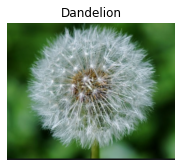

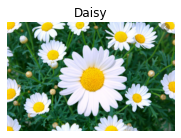

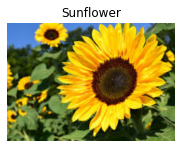

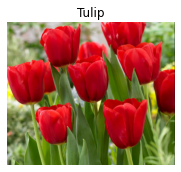

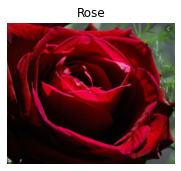

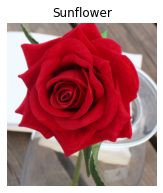

In [55]:
predict_class('dandelion.png') #validate model from random images found on the internet
predict_class('daisy.png')
predict_class('sunflower.png')
predict_class('tulip.png')
predict_class('rose.png')

predict_class('rose1.png')

<h3>Discussion</h3>
<p>From the result it can be seen that, the accuracy of the model is not very precise. Because, we took input images as 1-channel GRAYSCALE and thus losing all the color informatin. For flower recognition accuracy, color information is one of the biggest factor along with the shape. The accuracy can be further optimized by taking 3-channel RGB inputs.</p>
<h3>Future Direction</h3>
<ul>
<li>Bigger dataset should be used to improve the prediction accuracy.</li>
<li>Training and prediction should be done with consideration for the color channels.</li>
<li>Object detection with bounding boxes maybe implemented to detect multiple classes from one image.</li>
<li>Realtime recognition maybe implemented to detect the classes from video sources.</li>